...

✅ CSF mask test passed
✅ GM mask test passed
✅ WM mask test passed


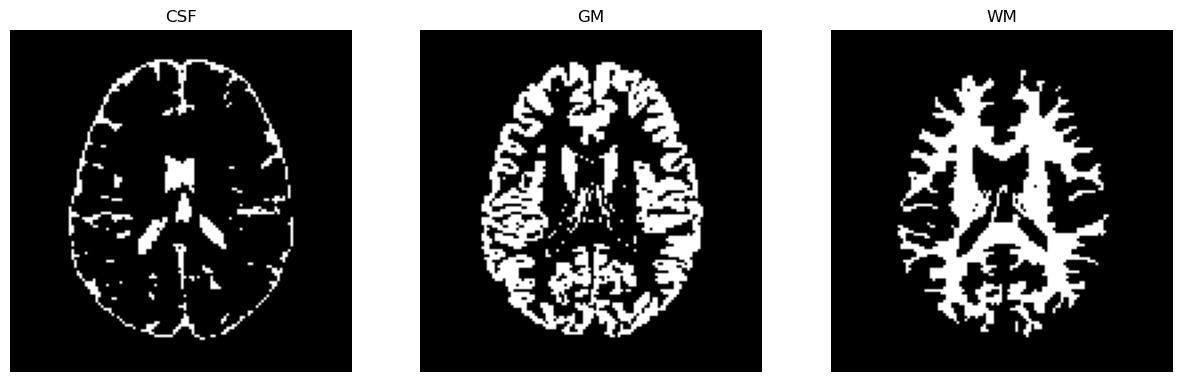

.
----------------------------------------------------------------------
Ran 4 tests in 0.164s

OK


In [1]:
import unittest
import numpy as np
from lab01 import *

class TestLab01(unittest.TestCase):

    def setUp(self):
        self.op = Lab01_op()
        self.op.load_data("digital_brain_phantom.mat")

    def test_get_csf_mask(self):
        mask = self.op.get_csf_mask()
        self.assertIsInstance(mask, np.ndarray, "CSF mask should be a NumPy array")
        self.assertEqual(mask.shape, self.op.label.shape, "CSF mask shape mismatch")
        self.assertTrue(np.all(np.isin(mask, [0, 1])), "CSF mask should only contain 0 and 1")
        self.assertEqual(np.sum(mask), np.sum(self.op.label == 1), "CSF mask pixel count mismatch")
        print("✅ CSF mask test passed")

    def test_get_gm_mask(self):
        mask = self.op.get_gm_mask()
        self.assertIsInstance(mask, np.ndarray, "GM mask should be a NumPy array")
        self.assertEqual(mask.shape, self.op.label.shape, "GM mask shape mismatch")
        self.assertTrue(np.all(np.isin(mask, [0, 1])), "GM mask should only contain 0 and 1")
        self.assertEqual(np.sum(mask), np.sum(self.op.label == 2), "GM mask pixel count mismatch")
        print("✅ GM mask test passed")

    def test_get_wm_mask(self):
        mask = self.op.get_wm_mask()
        self.assertIsInstance(mask, np.ndarray, "WM mask should be a NumPy array")
        self.assertEqual(mask.shape, self.op.label.shape, "WM mask shape mismatch")
        self.assertTrue(np.all(np.isin(mask, [0, 1])), "WM mask should only contain 0 and 1")
        self.assertEqual(np.sum(mask), np.sum(self.op.label == 3), "WM mask pixel count mismatch")
        print("✅ WM mask test passed")

    def test_masks_visualization(self):
        csf_mask = self.op.get_csf_mask()
        gm_mask = self.op.get_gm_mask()
        wm_mask = self.op.get_wm_mask()
        utils.imshow([csf_mask, gm_mask, wm_mask], ["CSF", "GM", "WM"])    

if __name__ == "__main__":
    unittest.main(argv=[''], exit=False)

    

...

✅ CSF mask test passed
✅ GM mask test passed
✅ WM mask test passed


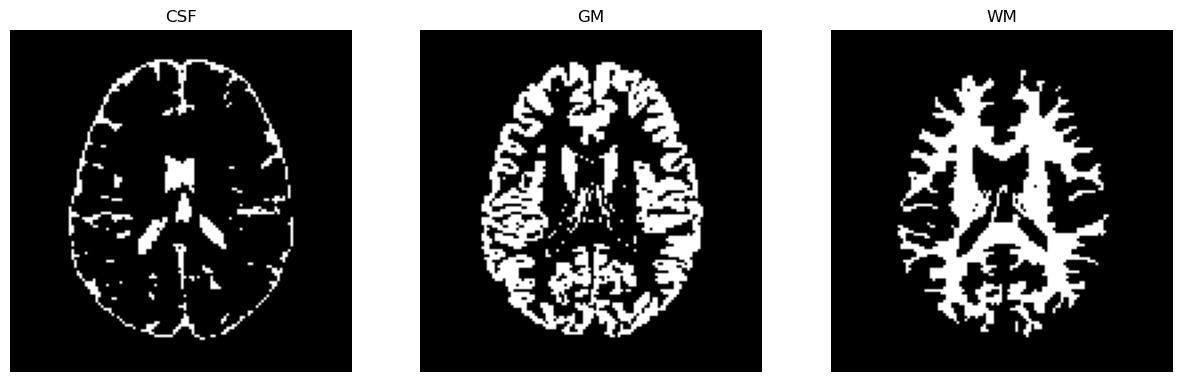

...

✅ CSF values correct: T1=2569.0, T2=329.0, PD=1.0
✅ GM values correct: T1=833.0, T2=83.0, PD=0.8599999999999961


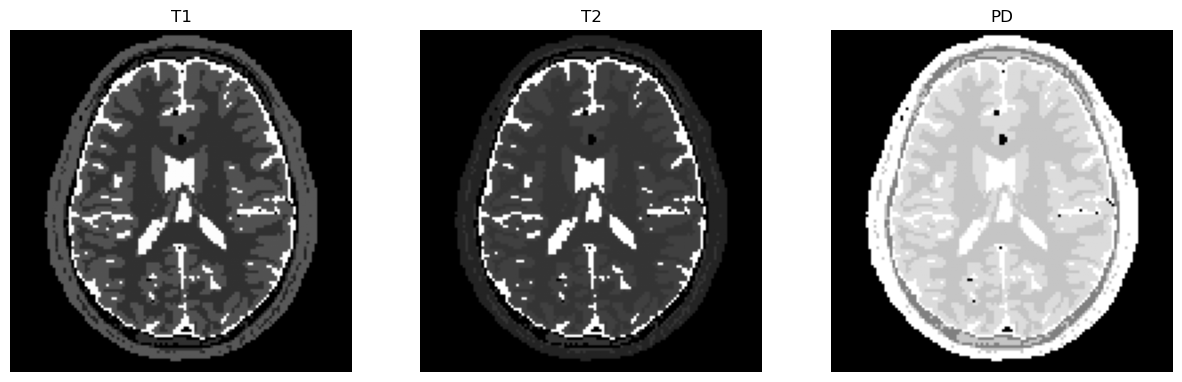

..
----------------------------------------------------------------------
Ran 8 tests in 0.209s

OK


✅ Visualized T1, T2, PD maps successfully
✅ WM values correct: T1=500.0, T2=70.0, PD=0.7699999999999846


In [2]:
import unittest
import numpy as np
from lab01 import Lab01_op
import utils

class TestLab01Maps(unittest.TestCase):

    def setUp(self):
        self.op = Lab01_op()
        self.op.load_data("digital_brain_phantom.mat")
        self.csf_mask = self.op.get_csf_mask()
        self.gm_mask = self.op.get_gm_mask()
        self.wm_mask = self.op.get_wm_mask()

    def test_visualize_maps(self):
        # Visualize T1, T2, PD maps
        utils.imshow([self.op.T1_map, self.op.T2_map, self.op.PD_map], ["T1", "T2", "PD"])
        print("✅ Visualized T1, T2, PD maps successfully")

    def test_csf_values(self):
        T1 = self.op.get_T1(self.csf_mask)
        T2 = self.op.get_T2(self.csf_mask)
        PD = self.op.get_PD(self.csf_mask)

        self.assertAlmostEqual(T1, 2569, delta=1, msg="CSF T1 mismatch")
        self.assertAlmostEqual(T2, 329, delta=1, msg="CSF T2 mismatch")
        self.assertAlmostEqual(PD, 1.0, delta=1e-6, msg="CSF PD mismatch")
        print(f"✅ CSF values correct: T1={T1}, T2={T2}, PD={PD}")

    def test_gm_values(self):
        T1 = self.op.get_T1(self.gm_mask)
        T2 = self.op.get_T2(self.gm_mask)
        PD = self.op.get_PD(self.gm_mask)

        self.assertAlmostEqual(T1, 833, delta=1, msg="GM T1 mismatch")
        self.assertAlmostEqual(T2, 83, delta=1, msg="GM T2 mismatch")
        self.assertAlmostEqual(PD, 0.86, delta=1e-6, msg="GM PD mismatch")
        print(f"✅ GM values correct: T1={T1}, T2={T2}, PD={PD}")

    def test_wm_values(self):
        T1 = self.op.get_T1(self.wm_mask)
        T2 = self.op.get_T2(self.wm_mask)
        PD = self.op.get_PD(self.wm_mask)

        self.assertAlmostEqual(T1, 500, delta=1, msg="WM T1 mismatch")
        self.assertAlmostEqual(T2, 70, delta=1, msg="WM T2 mismatch")
        self.assertAlmostEqual(PD, 0.77, delta=1e-6, msg="WM PD mismatch")
        print(f"✅ WM values correct: T1={T1}, T2={T2}, PD={PD}")

if __name__ == "__main__":
    unittest.main(argv=[''], exit=False)